<a href="https://colab.research.google.com/github/Tomokki/private_Python-.gitkeep/blob/main/%EF%BC%88%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E5%AD%A6%E7%BF%92%EF%BC%89Python_%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#決定木
* データに基づいた意思決定を行うときに用いられる方法
* 段階的にデータを分割していき、木のような分析結果を出力
* 決定木の利点は 「分析結果を人間が解釈することが容易」 ということ
* 人工知能（AI）が、なぜそのような判断をしたか、を視覚的に理解できる
* 人工知能の性能としてはまずまずといったところ
* 回帰と分類の両方が可能

####分析データの概要
* 分析データ「random_samples.csv 」
* 4つのラベルに分かれて乱数生成されたデータ

##データの読み込み
* 分析データに対して read_csv 関数 を実行
* 変数名は「df 」とする
* 分析データのデータクレンジングは不要

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("random_samples.csv")
df.head()

,x,y,label
0,8.031223,1.076846,1
1,0.792753,-8.492709,2
2,-6.247417,-2.809795,2
3,7.135052,-0.276206,1
4,8.753712,12.169550,0


##データの可視化
* 読み込んだデータを可視化

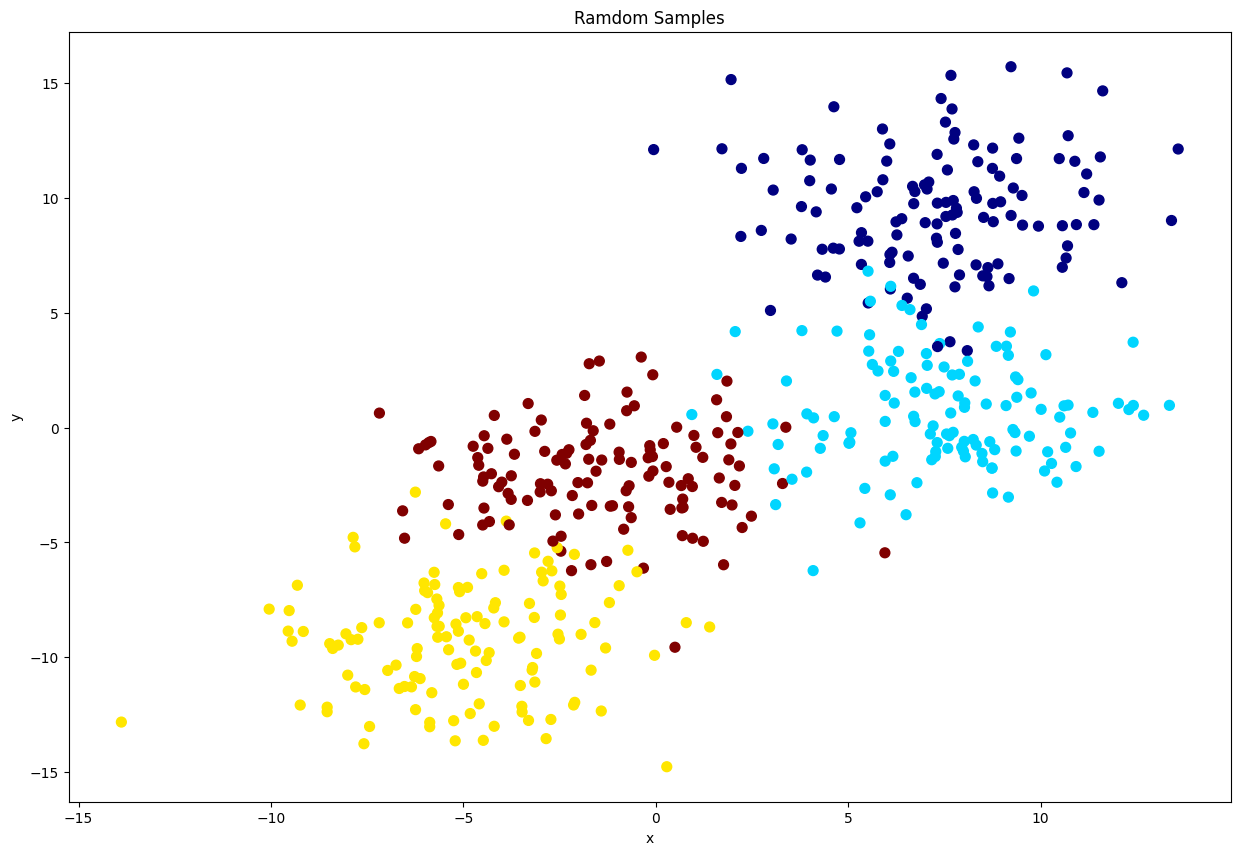

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(df["x"],df["y"],c=df["label"],s=50,cmap="jet")
plt.title("Ramdom Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##データの分割
* 分析データを学習用と検証用に分割

In [5]:
# 全ての説明変数を使用
x = df.drop(["label"],axis =1)
y = df["label"]

# データを学習用と検証用に分割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,train_size = 0.7 , test_size=0.3,random_state=0
)

##標準化
* 決定木ではデータの正規化や標準化や正規化は不要
* 単一の説明変数を用いて分類する手法であるため
* 複数の説明変数同士で比較する必要がない

####決定木の学習モデルを作成
* DecisionTreeClassifierライブラリを用いて決定木のモデルを作成

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 1,min_samples_split=3,random_state=0)
model.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=0)

* 決定木のツリーグラフをプロット

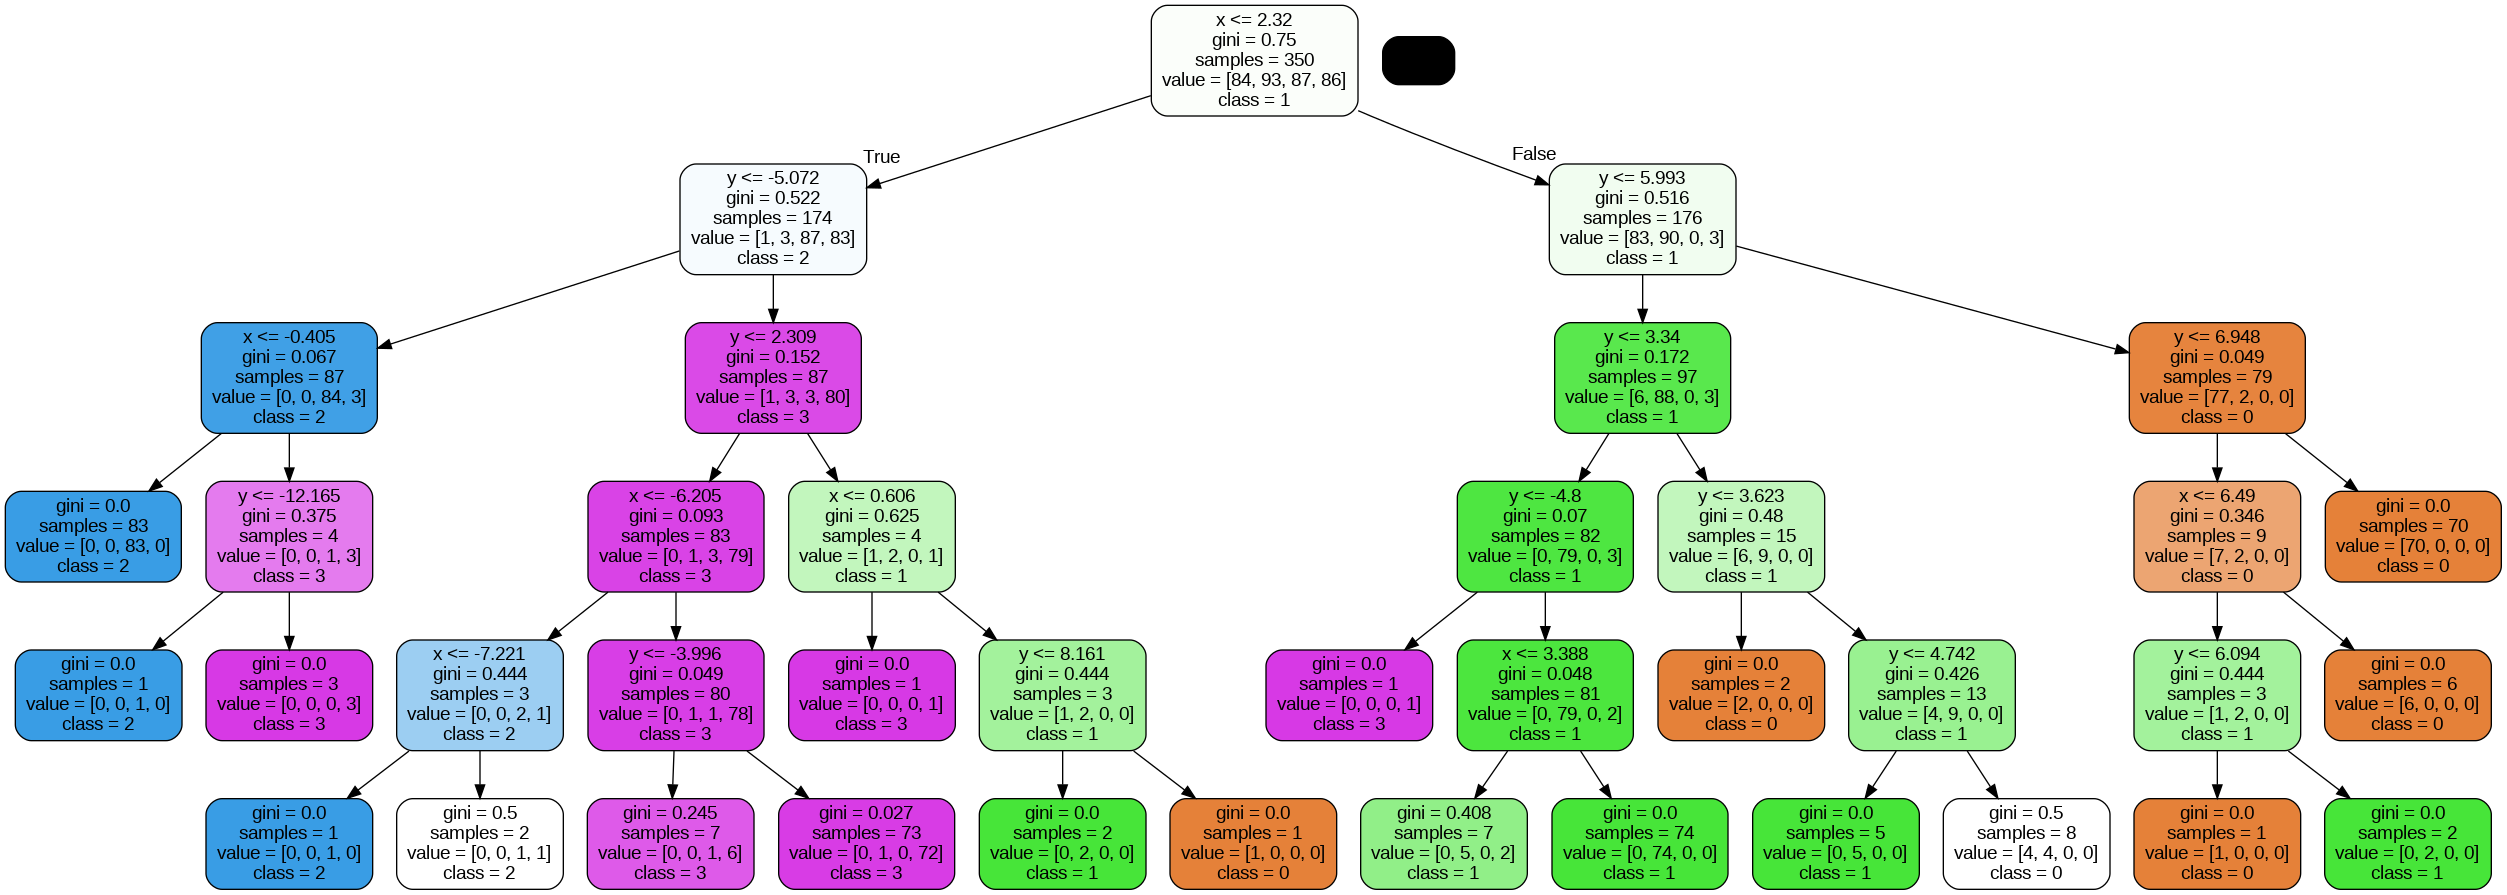

In [8]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
                feature_names=x_train.columns,
                class_names=["0","1","2","3"],
                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

* 決定木の各特徴量の重要性を可視化

Text(0, 0.5, 'feature')

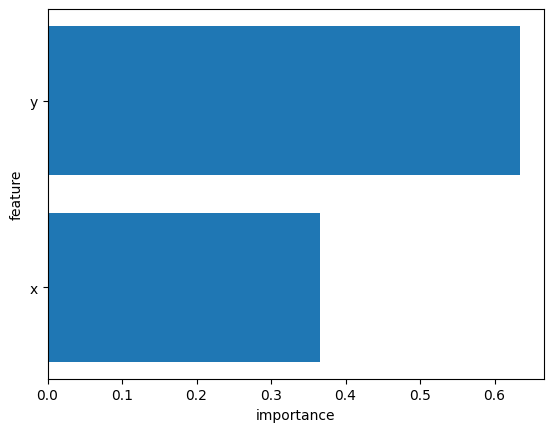

In [9]:
n_features = len(x_train.columns)
plt.barh(range(n_features),model.feature_importances_,align="center")
plt.yticks(np.arange(n_features),x_train.columns)
plt.xlabel("importance")
plt.ylabel("feature")

##学習モデルの当てはめ値の算出
* predict_proba関数を用いて学習モデルによる予測値を計算

In [11]:
#指数表記の禁止
np.set_printoptions(suppress=True)
model.predict_proba(x_test)


#2種類の説明変数からラベルを予測した結果を表示

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01369863, 0.        , 0.98630137],
       [0.        , 0.01369863, 0.        , 0.98630137],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.85714286],
       [0.        , 0.01369863, 0.        , 0.98630137],
       [0.        , 0.01369863, 0.        , 0.98630137],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.01369863, 0.        , 0.98630137],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        ,

##検証用データの分類結果
* 学習モデルを用いた検証用データの分類結果を表示

In [12]:
model.predict(x_test)

array([0, 2, 0, 3, 3, 2, 0, 3, 3, 3, 2, 1, 3, 0, 2, 0, 2, 0, 2, 3, 2, 1,
       1, 0, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 0, 2, 2, 1, 3, 3, 0, 1, 3,
       1, 3, 3, 3, 1, 2, 1, 3, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 3,
       1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 3, 2, 1, 0, 3, 3, 3, 1, 1, 0, 3, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 3, 0, 2, 2, 1, 3, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 3, 3, 0, 2, 2, 3, 3, 1, 0, 0, 0,
       3, 3, 3, 3, 1, 1, 0, 1, 2, 1, 0, 3, 3, 0, 3, 0, 1, 2])

##混同行列（confusion matrix）
* 実際のクラスが0,1 のデータに対して、クラス0,1 に分類されたデータの個数を要素とする行列

In [13]:
from sklearn.metrics import confusion_matrix
print("confusion matrix =")
print(confusion_matrix(y_true=y_test,y_pred=model.predict(x_test)))

confusion matrix =
[[37  3  0  1]
 [ 2 29  0  1]
 [ 0  0 34  4]
 [ 0  1  6 32]]


##正解率（accuracy）
* 分類したデータの総数のうち、正しく分類されたデータ数の割合

In [15]:
print("正解率(train):{:.3f}".format(model.score(x_train,y_train)))
print("正解率(test):{:.3f}".format(model.score(x_test,y_test)))

正解率(train):0.974
正解率(test):0.880


##適合率（precision)
* クラス1 に分類されたデータのうち、実際にクラス1 であるデータ数の割合

In [16]:
from sklearn.metrics import precision_score
print("precision=",precision_score(y_true = y_test,
                                   y_pred =model.predict(x_test),
                                   average=None))

precision= [0.94871795 0.87878788 0.85       0.84210526]


##再現率（recall)
* 実際にクラス1 であるデータのうち、クラス1 に分類されたデータ数の割合

In [17]:
from sklearn.metrics import recall_score
print("recall=",recall_score(y_true = y_test,
                                   y_pred =model.predict(x_test),
                                   average=None))

recall= [0.90243902 0.90625    0.89473684 0.82051282]


##F1スコア（F1 score）
* 適合率と再現率の調和平均
* 適合率と再現率はトレードオフの関係にあるため、F1 スコアはこれらのバランスを評価するための指標

In [18]:
from sklearn.metrics import f1_score
print("f1 score=",f1_score(y_true = y_test,
                                   y_pred =model.predict(x_test),
                                   average=None))

f1 score= [0.925      0.89230769 0.87179487 0.83116883]


##データの分類境界の可視化
* 学習モデルによるデータの分類境界の可視化

In [19]:
# データの分類境界の可視化
x = df["x"]
y = df["y"]
label = df["label"]

# 軸を自動調整
xlim = (x.min() - 0.1,x.max()+0.1)
ylim = (y.min() - 0.1,y.max()+0.1)
x_min,x_max = xlim
y_min,y_max = ylim


xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

# 分類器の予測を実行
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(-14.86600009, 15.813876279999999)

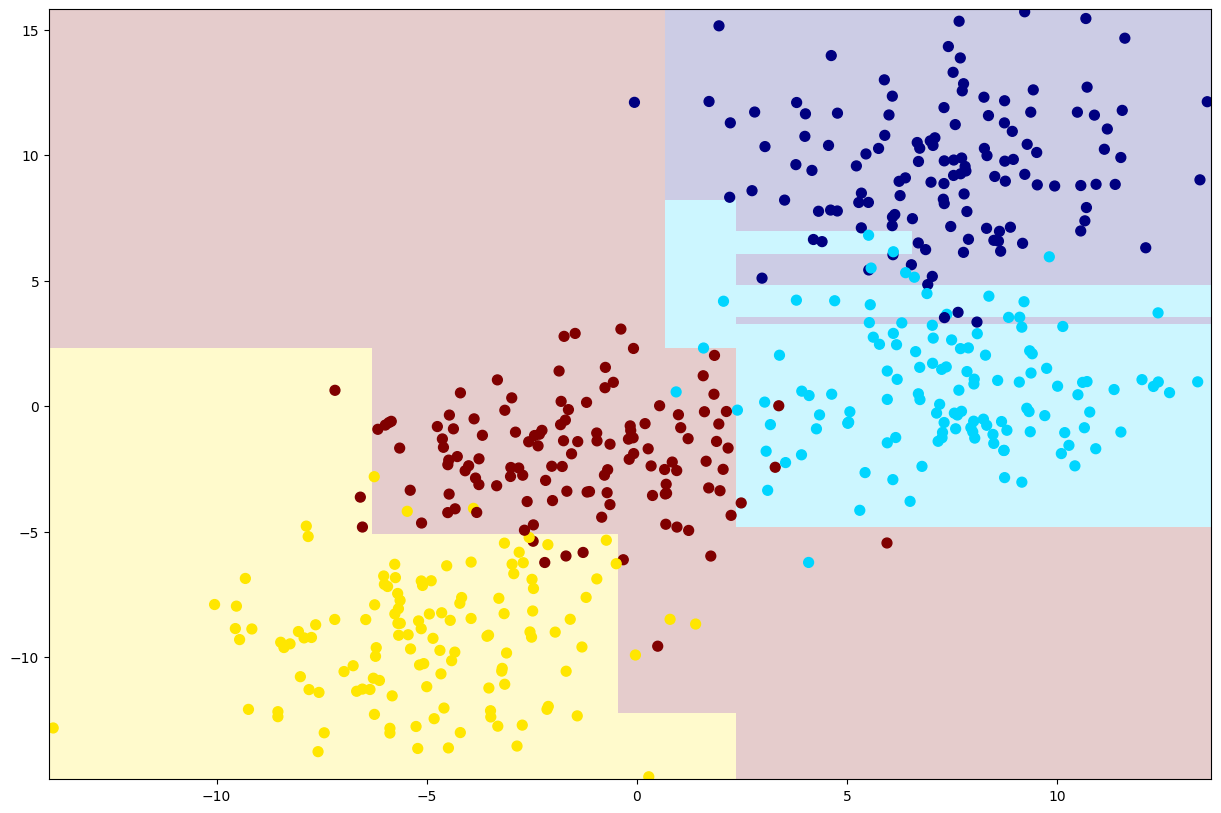

In [20]:
Z = Z.reshape(xx.shape)

plt.figure(figsize =(15,10))
plt.pcolormesh(xx,yy,Z,alpha=0.2,cmap="jet")

plt.scatter(x,y,c=label,s=50,cmap="jet")

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)